In [104]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [105]:
#Διάβασμα του αρχείου CSV

In [106]:
df = pd.read_csv('pl.csv', parse_dates=['Date'], dtype={'Season': object})

In [107]:
#Έλεγχος null καταχωρήσεων σε 3 φάσεις

In [108]:
df.isnull().values.any()

False

In [109]:
df.isnull().sum()

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [110]:
df.isnull().sum().sum()

0

### Σορτάρισμα ανά Season, έτσι ώστε στην κορυφή να είναι η τελευταία σαιζόν & reset Index

In [111]:
df = df.sort_values(['Season', 'Date'], ascending=False).reset_index(drop=True)
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1718,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,0,6,6,8,3,10,1,0,0,0
1,1718,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,8,1,11,11,8,7,0,2,0,0
2,1718,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,7,4,12,9,4,9,2,1,0,0


In [112]:
# Προσθήκη στήλης totalGoals με το σύνολο των γκολ ανα αγώνα.

In [113]:
df['totalGoals'] = df['FTHG'] + df['FTAG']

### Εμφάνιση των 3 πρώτων γραμμών

In [114]:
df.head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
0,1718,2018-12-03,Stoke,Man City,0,2,A,0,1,A,...,6,6,8,3,10,1,0,0,0,2
1,1718,2018-12-02,Chelsea,West Brom,3,0,H,1,0,H,...,1,11,11,8,7,0,2,0,0,3
2,1718,2018-11-03,Arsenal,Watford,3,0,H,1,0,H,...,4,12,9,4,9,2,1,0,0,3


### Εμφάνιση των 3 τελευταίων γραμμών

In [115]:
df.tail(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
2657,1112,2011-01-10,Man United,Norwich,2,0,H,0,0,D,...,6,9,6,10,3,1,0,0,0,2
2658,1112,2011-01-10,Sunderland,West Brom,2,2,D,2,2,D,...,3,9,13,7,4,2,0,0,0,4
2659,1112,2011-01-10,Wolves,Newcastle,1,2,A,0,2,A,...,6,7,10,10,5,1,2,0,0,3


### Έλεγχος μοναδικών σαιζόν

In [116]:
df['Season'].unique()

array(['1718', '1617', '1516', '1415', '1314', '1213', '1112'], dtype=object)

### Εμφάνιση συνόλου των μοναδικών σαιζόν στο dataset.

In [117]:
df['Season'].nunique()

7

### Εμφάνιση του συνόλου των αγώνων ανά σαιζόν

In [118]:
df['Season'].value_counts().sort_index()

1112    380
1213    380
1314    380
1415    380
1516    380
1617    380
1718    380
Name: Season, dtype: int64

### Σύνολο γκολ ανα σαιζόν

In [119]:
#df.groupby('Season').sum().reset_index()
#df2 = df.groupby('Season').sum().reset_index()
df2 = df.groupby(['Season'])[["totalGoals"]].sum().reset_index()
df2.sort_values('totalGoals', ascending=False)

,Season,totalGoals
0,1112,1066
5,1617,1064
1,1213,1063
2,1314,1052
4,1516,1026
6,1718,1018
3,1415,975


### Μέσος όρος των γκολ ανα σαιζόν

In [120]:
# ΠΕΡΙΛΑΜΒΑΝΕΤΑΙ ΤΑΞΙΝΟΜΗΣΗ ΤΟΥ ΑΠΟΤΕΛΕΣΜΑΤΟΣ. ΣΤΗΝ ΚΟΡΥΦΗ ΒΡΙΣΚΕΤΑΙ Η ΣΑΙΖΟΝ ΠΟΥ ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ.
# ΣΤΗ ΣΥΓΚΕΚΡΙΜΕΝΗ ΠΕΡΙΠΤΩΣΗ Η ΣΑΙΖΟΝ 2011-12 ΕΙΧΕ ΤΟΝ ΜΕΓΑΛΥΤΕΡΟ ΜΕΣΟ ΟΡΟ ΓΚΟΛ ΜΕ 2,81 ΓΚΟΛ ΑΝΑ ΑΓΩΝΑ

In [121]:
df3 = df.groupby(['Season'])[["totalGoals"]].mean().reset_index()
df3.sort_values('totalGoals', ascending=False)

,Season,totalGoals
0,1112,2.81
5,1617,2.80
1,1213,2.80
2,1314,2.77
4,1516,2.70
6,1718,2.68
3,1415,2.57


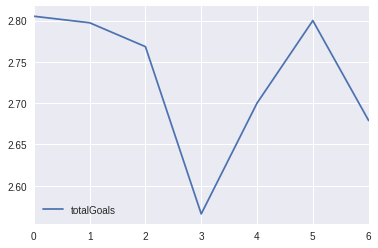

In [122]:
df3[['Season','totalGoals']].plot()

### Σύνολο των γκολ όλων των σαιζόν

In [123]:
df['totalGoals'].sum()

7264

### Μέσος όρος γκολ όλων των σαιζόν

In [124]:
df['totalGoals'].mean()

2.730827067669173

### Αγώνες με περισσότερα από 5 γκολ, για την ομάδα εντός έδρας

In [125]:
df.query('FTHG >= 5').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
16,1718,2018-10-02,Man City,Leicester,5,1,H,1,1,D,...,2,10,12,8,2,2,3,0,0,6
36,1718,2018-06-05,Arsenal,Burnley,5,0,H,2,0,H,...,2,6,7,4,5,0,1,0,0,5
47,1718,2018-05-13,Tottenham,Leicester,5,4,H,1,2,A,...,9,9,13,4,4,1,2,0,0,9


### Αγώνες με περισσότερα από 5 γκολ, για την ομάδα εκτός έδρας

In [126]:
df.query('FTAG >= 5').head(3)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
269,1718,2017-10-22,Everton,Arsenal,2,5,A,1,1,D,...,14,14,14,0,7,1,1,1,0,7
318,1718,2017-09-16,Watford,Man City,0,6,A,0,3,A,...,10,8,6,3,11,2,0,0,0,6
370,1718,2017-02-12,Brighton,Liverpool,1,5,A,0,2,A,...,6,8,7,2,2,1,0,0,0,6


### Εμφάνιση των εντός έδρας αγώνων συγκεκριμένης ομάδας - Function

In [127]:
# df.loc[(df['HomeTeam'] == 'Liverpool' )]
home_team = lambda x: df.loc[(df['HomeTeam'] == x)]

In [128]:
home_team('Liverpool').head(2)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
42,1718,2018-05-13,Liverpool,Brighton,4,0,H,2,0,H,...,1,3,6,7,3,0,0,0,0,4
63,1718,2018-04-28,Liverpool,Stoke,0,0,D,0,0,D,...,1,7,14,9,2,1,2,0,0,0


### Εμφάνιση των εκτός έδρας αγώνων συγκεκριμένεης ομάδας - Function

In [129]:
# df.loc[(df['HomeTeam'] == 'Leicester' )]
away_team = lambda x: df.loc[(df['AwayTeam'] == x)]

In [130]:
away_team('Chelsea').head(4)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
44,1718,2018-05-13,Newcastle,Chelsea,3,0,H,1,0,H,...,2,11,10,4,2,0,1,0,0,3
56,1718,2018-05-02,Watford,Chelsea,4,1,H,1,0,H,...,3,11,8,6,2,2,2,0,1,5
66,1718,2018-04-28,Swansea,Chelsea,0,1,A,0,1,A,...,3,13,9,1,2,1,1,0,0,1
73,1718,2018-04-19,Burnley,Chelsea,1,2,A,0,1,A,...,5,9,11,3,2,1,0,0,0,3


### Εμφάνιση όλων των αγώνων συγκεκριμένης ομάδας & συγκεκριμένης σαιζόν

In [131]:
#df.query('HomeTeam == "Liverpool" | AwayTeam == "Liverpool" ')
df.loc[((df['HomeTeam'] == 'Liverpool') | (df['AwayTeam'] == 'Liverpool')) & (df['Season'] == 1617 ) ].head(2)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals


### Εμφάνιση των αγώνων συγκεκριμένης ημερομηνίας - Function

In [132]:
#df.loc[(df['Date'] == '24/09/16' )]
specific_date = lambda x: df.loc[(df['Date'] == x )]

In [133]:
specific_date('24/09/16')

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
683,1617,2016-09-24,Arsenal,Chelsea,3,0,H,3,0,H,...,2,9,11,9,1,0,2,0,0,3
684,1617,2016-09-24,Bournemouth,Everton,1,0,H,1,0,H,...,2,10,14,5,3,2,2,0,0,1
685,1617,2016-09-24,Liverpool,Hull,5,1,H,3,0,H,...,1,8,8,13,2,1,2,0,1,6
686,1617,2016-09-24,Man United,Leicester,4,1,H,4,0,H,...,3,9,12,8,6,0,2,0,0,5
687,1617,2016-09-24,Middlesbrough,Tottenham,1,2,A,0,2,A,...,5,14,9,2,10,2,1,0,0,3
688,1617,2016-09-24,Stoke,West Brom,1,1,D,0,0,D,...,3,9,13,6,6,3,4,0,0,2
689,1617,2016-09-24,Sunderland,Crystal Palace,2,3,A,1,0,H,...,4,15,12,3,5,0,2,0,0,5
690,1617,2016-09-24,Swansea,Man City,1,3,A,1,1,D,...,4,15,9,2,7,2,4,0,0,4


### Εμφάνιση των αγώνων μεταξύ 2 συγεκριμένων ομάδων.

In [134]:
#df.loc[(df['HomeTeam'] == 'Liverpool' & ['AwayTeam'] == 'Leicester')]
#df.query('HomeTeam == "Liverpool" & AwayTeam == "Hull" ')
home_away = lambda x,y: df.loc[(df['HomeTeam'] == x) & (df['AwayTeam'] == y)]

In [135]:
home_away('Hull','Liverpool')

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
495,1617,2017-04-02,Hull,Liverpool,2,0,H,1,0,H,...,5,9,12,1,15,2,1,0,0,2
1216,1415,2015-04-28,Hull,Liverpool,1,0,H,1,0,H,...,9,10,10,7,7,2,0,0,0,1
1894,1314,2013-01-12,Hull,Liverpool,3,1,H,1,1,D,...,4,10,16,2,6,2,0,0,0,4


### Σύνολο αγώνων που σφύριξε ο κάθε διαιτητής ξεχωριστά

In [136]:
df['Referee'].value_counts().head(3)

M Dean        202
M Atkinson    194
M Oliver      188
Name: Referee, dtype: int64

In [137]:
#df.drop(['Date','Season'], axis=1)
#df[[i for i in list(df.columns) if i != 'HomeTeam']]
#df[['HomeTeam','AwayTeam']]

### Σύνολο των γκολ, ταξινόμηση σε HomeTeam

In [138]:
#sum_team = lambda x: df.groupby(['Season', 'HomeTeam']).sum().loc[x]

In [145]:
#sum_team('1617').sort_values(['FTHG', 'FTAG'], ascending=[0,1])

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,totalGoals
HomeTeam,,,,,,,,,,,,,,,,,
Chelsea,55,17,25,10,316,154,121,57,185,250,129,86,32,40,0,1,72
Tottenham,47,9,23,3,373,150,147,45,209,254,148,56,27,49,0,2,56
Liverpool,45,18,24,9,331,141,127,45,194,194,116,61,22,38,0,1,63
Everton,42,16,17,6,277,194,112,58,215,216,120,110,36,33,1,1,58
Arsenal,39,16,15,9,329,199,114,80,200,212,132,87,34,41,3,1,55
Man City,37,17,15,3,336,124,115,44,188,211,151,64,32,47,4,1,54
Bournemouth,35,29,15,12,253,233,91,75,173,262,98,90,24,43,1,2,64
Leicester,31,25,13,8,240,257,83,91,201,177,110,99,30,27,0,0,56
Hull,28,35,8,12,208,304,69,112,219,210,73,115,32,34,2,1,63


### Εμφάνιση Μ.Ο. των γκολ με ταξινόμηση Home Team

In [140]:
#mean_team = lambda x: df.groupby(['Season', 'HomeTeam']).mean().loc[x]

In [141]:
#mean_team(1718).sort_values(['FTHG', 'FTAG'], ascending=[0,1])

In [142]:
df.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'totalGoals'],
      dtype='object')

In [143]:
df.index

RangeIndex(start=0, stop=2660, step=1)